## Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Preparation

In [73]:
data = pd.read_csv('ex1data2.txt', names = ['size', 'bedrooms', 'price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [74]:
# standardization
def standardize_features(data):
    return (data - data.mean()) / data.std()

In [75]:
data = standardize_features(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

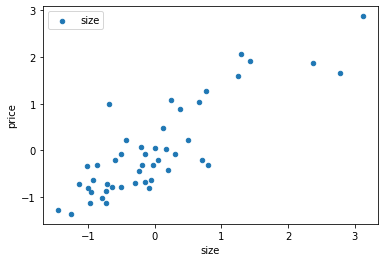

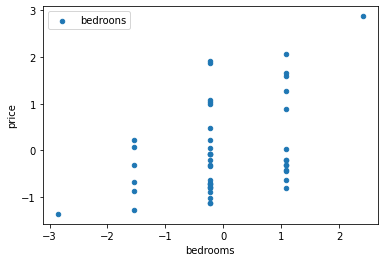

In [76]:
# scatter plot
data.plot.scatter('size', 'price', label='size')
data.plot.scatter('bedrooms', 'price', label='bedroons')

#### Model from Scratch

In [77]:
data.insert(0,'ones',1)
X = data.iloc[:, :-1]
y = data.iloc[:,-1]
X = X.values
y = y.values
y = y.reshape(len(y),1)

In [80]:
theta = np.zeros((X.shape[1],1))

In [81]:
# loss function
def lossFunction(X, y, theta):
    #inner = np.power(((X * theta.T) - y), 2)
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [82]:
# gradient desent algorithm
def gradientDescent(X, y, theta, alpha, iters, isPrint=False):
    loss = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y)) * alpha / len(X)
        current_loss = lossFunction(X, y, theta)
        loss.append(current_loss)
        
        if i%100 == 0:
            if isPrint:
                print(current_loss)
        
    return theta, loss

In [83]:
# try different alpha
alpha = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]
iters = 2000

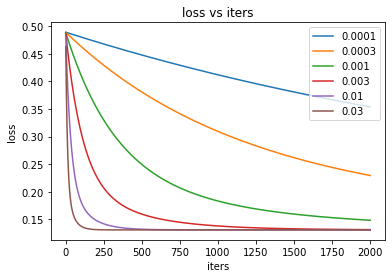

In [84]:
fig, ax = plt.subplots()

for a in alpha:
    _, loss = gradientDescent(X, y, theta, a, iters)
    ax.plot(np.arange(iters), loss, label=a)
    ax.legend()

ax.set(xlabel = 'iters',
       ylabel = 'loss',
       title = 'loss vs iters')
plt.show()

#### sklearn Library

In [85]:
from sklearn import linear_model

In [86]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [87]:
y_pred = model.predict(X)

In [88]:
y_pred.shape

(47, 1)

In [89]:
# convert to 1d
y_pred.flatten().shape

(47,)

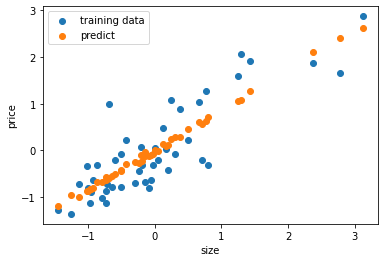

In [90]:
# plot price vs size
fig, ax = plt.subplots()
ax.scatter(X[:, 1], y, label = 'training data')
ax.scatter(X[:, 1], y_pred, label = 'predict')
ax.legend()
ax.set(xlabel = 'size',
       ylabel = 'price')
plt.show()